# Exploring Used Cars Sold on eBay Kleinanzeigen

## Introduction

In this project, we'll examine a [data set](https://data.world/data-society/used-cars-data) of used cars from a classifieds section of the German website [eBay Kleinanzeigen](https://www.ebay-kleinanzeigen.de/). The data was scraped and cleaned by Kaggle by user [orgesleka](https://www.kaggle.com/orgesleka), who originally uploaded it.

This project is largely exploratory, but the main questions we'll ask are: 
* What kind of cars are most typically sold in the classifieds on eBay Kleinanzeigen?
* What is the price range of the most typically sold cars? 
* How quickly do the most typically posted cars on eBay Kleinanzeigen sell?

First, let's look at the data and clean it before we get into the questions.

## A Look at the Data

| **Variable** | **Description** |
| --- | --- |
| dateCrawled | When this ad was first crawled. All field-values are taken from this date. |
| name | Name of the car. |
| seller | Whether the seller is private or a dealer. |
| offerType | The type of listing |
| price | The price on the ad to sell the car. |
| abtest | Whether the listing is included in an A/B test. |
| vehicleType | The vehicle Type. |
| yearOfRegistration | The year in which the car was first registered. |
| gearbox | The transmission type. |
| powerPS | The power of the car in PS. |
| model | The car model name. |
| kilometer | How many kilometers the car has driven. |
| monthOfRegistration | The month in which the car was first registered. |
| fuelType | What type of fuel the car uses. |
| brand | The brand of the car. |
| notRepairedDamage | If the car has a damage which is not yet repaired. |
| dateCreated | The date on which the eBay listing was created. |
| nrOfPictures | The number of pictures in the ad. |
| postalCode | The postal code for the location of the vehicle. |
| lastSeenOnline | When the crawler saw this ad last online. |


First, let's import our libraries and the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
autos = pd.read_csv("../Datasets/autos.csv", encoding = "Latin-1")

Now, let's take a quick look at the data itself and summaries of its features and variables.

In [3]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

We can see from the info that there are a lot of missing values for vehicleType, gearbox, model, fuelType, and notRepairedDamage. However, all numeric values seem to be read as numeric, so we don't have any clear problems there.

In [5]:
round(autos.describe(include='all'),2) # describing numeric variables

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.00,351319,371528.00,351044,371528.00,371528.00,338142,371528,299468,371528,371528.0,371528.00,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.58,NaN,115.55,NaN,125618.69,5.73,NaN,NaN,NaN,NaN,0.0,50820.67,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.87,NaN,192.14,NaN,40112.34,3.71,NaN,NaN,NaN,NaN,0.0,25799.08,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.00,NaN,0.00,NaN,5000.00,0.00,NaN,NaN,NaN,NaN,0.0,1067.00,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.00,NaN,70.00,NaN,125000.00,3.00,NaN,NaN,NaN,NaN,0.0,30459.00,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.00,NaN,105.00,NaN,150000.00,6.00,NaN,NaN,NaN,NaN,0.0,49610.00,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.00,NaN,150.00,NaN,150000.00,9.00,NaN,NaN,NaN,NaN,0.0,71546.00,NaN


A few notes on variable values:
* yearOfRegistration includes a minimum of 1000 and a max of 9999, which is not possible.
* monthOfRegistration includes a minimum of 0 and a max of 12. The zeroes probably shouldn't be there.* monthOfRegistration includes a minimum of 0 and a max of 12. The zeroes probably shouldn't be there.
* powerPS also includes unreasonable minimum and maximum of 0 and 20,000.
* nrOfPictures seems to be zero for all entries, making it a useless variable.
* minimum and maximum price values are likely not right.


Let's take a closer look at some of the string variables to see how frequent the unique values are in each one.

In [6]:
int_str_vars = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
for v in int_str_vars:
    print(v + '\n')
    print(autos[v].value_counts())
    print('\n')

seller

privat        371525
gewerblich         3
Name: seller, dtype: int64


offerType

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64


abtest

test       192585
control    178943
Name: abtest, dtype: int64


vehicleType

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64


gearbox

manuell      274214
automatik     77105
Name: gearbox, dtype: int64


model

golf               30070
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64


fuelType

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: i

Of these variables, it looks like only `seller` and `offer_type` are useless in the representation of values. Along with `nrOfPictures`, that makes 3 columns to drop.

## Cleaning the Data

### Removing Useless Columns

In [7]:
autos.drop(['seller', 'offerType', 'nrOfPictures'], axis=1, inplace=True)

### Renaming Columns

First, let's change some of the column names to be more readable. We will do this by getting rid of the camel case and adding underscores instead. Also, reversing the phrasing of a few will making everything easier to read.

In [8]:
autos.rename(
    {"monthOfRegistration": "registration_month", 
     "yearOfRegistration": "registration_year", 
     "notRepairedDamage": "unrepaired_damage", 
     "dateCreated": "ad_created", 
     "dateCrawled": "date_crawled", 
     "vehicleType": "vehicle_type", 
     "fuelType": "fuel_type", 
     "postalCode": "postal_code",
     "kilometer": "odometer_km",
     "lastSeen": "last_seen"
    }, axis=1, inplace=True
)
print(autos.columns)

Index(['date_crawled', 'name', 'price', 'abtest', 'vehicle_type',
       'registration_year', 'gearbox', 'powerPS', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'ad_created', 'postal_code', 'last_seen'],
      dtype='object')


In [9]:
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


Let's further explore those variables that seemed to have weird ranges and do something about them.

### Cleaning Registration Year Values

In [10]:
# autos['registration_year'].value_counts().sort_values()
autos['registration_year'].describe(percentiles=[.1,.2,.8,.9])
#autos.hist(column ='registration_year', bins=20)

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
10%        1995.000000
20%        1998.000000
50%        2003.000000
80%        2009.000000
90%        2013.000000
max        9999.000000
Name: registration_year, dtype: float64

Looks like most registration years are be between roughly 1995 and 2013, as they should be. Let's look a little closer at the low end of the range, since the high end can just be set by the current year.

The first car patent was filed in 1886. How many cars are in the range before that and how many fall into the unique values?

In [11]:
# autos[autos['registration_year'].between(999,1885)].hist(column ='registration_year')
autos[autos['registration_year'] < 1886].shape[0]

68

In [12]:
print(autos.loc[autos['registration_year'] < 1886, 'registration_year'].value_counts())

1000    38
1500     5
1800     5
1111     4
1234     4
1600     2
1300     2
1400     1
1001     1
1255     1
1253     1
1602     1
1200     1
1688     1
1039     1
Name: registration_year, dtype: int64


It seems there are 68 impossible year values here, with a majority being labeled "1000". The documentation doesn't include anything about this year. We'll create a cleaned data set where the registration year is set to NaN for those before 1886 and after 2022. We'll assume the other dates are all correct.

In [13]:
autos.loc[~(autos['registration_year'].between(1885,2023)), 'registration_year'] = np.nan

autos['registration_year'].describe(percentiles=[.1,.2,.8,.9])

count    371346.000000
mean       2003.348489
std           7.776980
min        1910.000000
10%        1995.000000
20%        1998.000000
50%        2003.000000
80%        2009.000000
90%        2013.000000
max        2019.000000
Name: registration_year, dtype: float64

<AxesSubplot:>

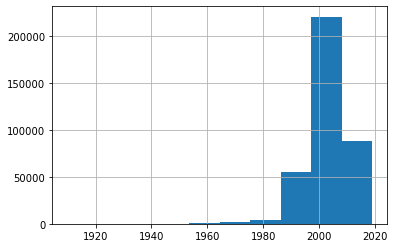

In [14]:
autos['registration_year'].hist()

This range and distribution looks much more reasonable.

### Cleaning Registration Month Variable

As stated above, the range of registration month goes down to 0. Let's take a look at the distribution of values.

In [15]:
autos['registration_month'].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: registration_month, dtype: int64

Luckily, there's a fairly even distribution. Let's set the '0' month entries to NaN so they don't mess up any analyses.

In [16]:
autos.loc[autos['registration_month'] == 0, 'registration_month'] = np.nan

In [17]:
autos['registration_month'].value_counts()

3.0     36170
6.0     33167
4.0     30918
5.0     30631
7.0     28958
10.0    27337
11.0    25489
12.0    25380
9.0     25074
1.0     24561
8.0     23765
2.0     22403
Name: registration_month, dtype: int64

No more zeroes.

### Cleaning Power PS

Maximum horsepower (PS, or "Pferdestarke" in German) for a car in 2022 is somewhere around 2000, according to [this article](https://newatlas.com/automotive/most-powerful-cars-hypercars-horsepower-megacars/). However, most modern cars are [between 100 and 200](https://www.autolist.com/guides/average-car-horsepower). The Ford Model T, one of the earliest mass-produced cars in 1913 had [around 20 horsepower](https://www.britannica.com/technology/Model-T). Thus, we can expect the cars on eBay Kleinanzeigen to range mostly in the modern 100-300 range, with perhaps a few exceptions for older cars.

So what does the distribution look like in our data set?

In [18]:
print(autos['powerPS'].describe(percentiles=[.1,.2,.8,.9]))

count    371528.000000
mean        115.549477
std         192.139578
min           0.000000
10%           0.000000
20%          60.000000
50%         105.000000
80%         160.000000
90%         193.000000
max       20000.000000
Name: powerPS, dtype: float64


Some values are extremely high, and some are zero. First, let's make those marked with unreasonable numbers like zero or > 2000 as NaN.



In [19]:
autos.loc[autos['powerPS'] == 0, 'powerPS'] = np.nan
autos.loc[autos['powerPS'] > 2000, 'powerPS'] = np.nan

Now, let's look at ones that would be considered high and low and see what the tallies on our unique values are.

In [20]:
print(autos.loc[autos['powerPS'] < 100, 'powerPS'].value_counts())
print('\n')
print(autos.loc[autos['powerPS'] > 300, 'powerPS'].value_counts())

75.0    24035
60.0    15907
90.0    12748
54.0     5752
50.0     4661
        ...  
21.0        6
28.0        6
32.0        5
22.0        5
9.0         5
Name: powerPS, Length: 99, dtype: int64


306.0     1131
340.0      354
320.0      284
333.0      276
313.0      271
          ... 
1252.0       1
607.0        1
1895.0       1
1160.0       1
1937.0       1
Name: powerPS, Length: 387, dtype: int64


This is still quite a few different values, and quite a few at as low a PS as 54. Let's look at what kinds of cars are showing as having extremely low and high PS.

In [21]:
autos.loc[autos['powerPS'] < 30, ['powerPS', 'registration_year', 'name', 'brand', 'price']].sort_values('powerPS')

,powerPS,registration_year,name,brand,price
34798,1.0,2004.0,smart_klima_tuev_bis_05/2017,smart,3900
142298,1.0,2002.0,Daewoo_Rezzo_2_0_CDX,daewoo,1
159047,1.0,1994.0,Opel_Astra_1.4_fur_Ersatzteile,opel,1
282070,1.0,2002.0,MAZDA_323__2002b.____TÜF__12.2016__EXTRA_RADIO...,mazda,1200
333741,1.0,2012.0,BIG_Bobby_Car_Classic_Girlie_im_sehr_guten_Geb...,sonstige_autos,20
...,...,...,...,...,...
80049,29.0,1978.0,Fiat_/zastava_750,fiat,0
34369,29.0,1982.0,Citroën_Acadiane,citroen,2990
42189,29.0,1985.0,Renault_R_4_TL_UNGESCHWEISST_mit_sehr_gutem_In...,renault,1850
370621,29.0,1988.0,Citroen_2CV_graue_Charleston_komplett_restauriert,citroen,11300


In [22]:
autos.loc[autos['powerPS'] > 1000, ['powerPS', 'registration_year', 'name', 'brand', 'price']].sort_values('powerPS')

,powerPS,registration_year,name,brand,price
83188,1001.0,2000.0,Zu_verkaufen_Mercedes_A_160_mit_neu_TÜV,mercedes_benz,1650
369007,1001.0,2001.0,!!!!!_Opel_zafira_2.0_dti_16_v_comfort_verkauf...,opel,1500
5582,1001.0,1999.0,verkauf__bastler__export,opel,500
52118,1001.0,2003.0,Ford_Focus_1.8_Diesel,ford,1500
188590,1001.0,1995.0,Audi_AG_im_guten_zustand,audi,1100
...,...,...,...,...,...
30309,1999.0,1996.0,Vw_Golf_3_Varriant__KEINE_PAPIERE_!!,volkswagen,300
316278,2000.0,2006.0,VW_GOLF_V_GTI,volkswagen,10500
211619,2000.0,1991.0,Austausch,bmw,0
370612,2000.0,2017.0,Dodge_journey_sxt_crd,chrysler,12500


Most of the car types with extremely high PS seem to be unreliable. At the low end, those above 20 PS seem decently reliable per Google searches.

<AxesSubplot:>

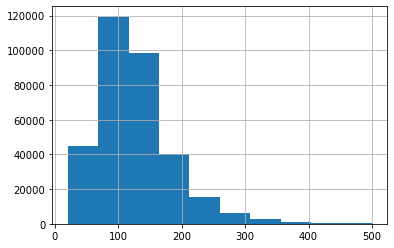

In [23]:
autos.loc[autos['powerPS'].between(20,500), 'powerPS'].hist()

We'll put a lower cutoff at 20 and say we're only interested in cars up to 400 PS, since most of the distribution lies between these values.

In [24]:
autos = autos.loc[autos['powerPS'].between(20,400),:]

In [25]:
print(autos['powerPS'].describe(percentiles=[.1,.2,.8,.9]))

count    328400.000000
mean        124.379336
std          57.166531
min          20.000000
10%          60.000000
20%          75.000000
50%         115.000000
80%         163.000000
90%         197.000000
max         400.000000
Name: powerPS, dtype: float64


### Cleaning Price

Let's look again at the distribution of prices in our data set.

In [26]:
print(autos['price'].describe(percentiles=[.1,.2,.8,.9]))

count    3.284000e+05
mean     9.618878e+03
std      5.359486e+05
min      0.000000e+00
10%      6.000000e+02
20%      1.000000e+03
50%      3.299000e+03
80%      9.200000e+03
90%      1.450000e+04
max      1.000000e+08
Name: price, dtype: float64


Zero is possible, but unlikely, and some car/s are way off the map at the top. Let's investigate the top and bottom of the range.

In [27]:
autos.sort_values('price')

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
292816,2016-03-19 17:43:48,Tausche_Peugeot_106_Rally_gegen_Polo_6n,0,control,kleinwagen,1997.0,manuell,75.0,NaN,150000,NaN,NaN,peugeot,nein,2016-03-19 00:00:00,92637,2016-04-01 06:47:27
132047,2016-03-15 19:37:33,Skoda_fabia_1.4_75ps_Euro_4___e_Fenster___Klim...,0,control,kombi,2005.0,manuell,75.0,fabia,150000,8.0,benzin,skoda,NaN,2016-03-15 00:00:00,95700,2016-03-15 19:37:33
129556,2016-03-26 21:56:53,Audi_a6__Tausch_moeglich_,0,control,limousine,1998.0,manuell,193.0,a6,150000,NaN,benzin,audi,nein,2016-03-26 00:00:00,24539,2016-04-02 16:15:30
35730,2016-03-11 18:42:54,Top_gepflegter_BMW_E61_530d_Leder_Navi___Volla...,0,test,kombi,2004.0,manuell,218.0,5er,150000,6.0,diesel,bmw,NaN,2016-03-11 00:00:00,7629,2016-03-16 06:44:31
12603,2016-03-22 14:38:44,Vw_Golf_III_1_6_Europe_Edition,0,control,kleinwagen,1994.0,manuell,75.0,golf,150000,7.0,benzin,volkswagen,nein,2016-03-22 00:00:00,84187,2016-03-23 22:15:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108987,2016-03-29 00:38:37,Biete_Hier_zum_Tauschen_an_aber_nur_realistisc...,99999999,test,NaN,2017.0,manuell,110.0,golf,150000,NaN,NaN,volkswagen,NaN,2016-03-28 00:00:00,35447,2016-04-05 14:16:25
325589,2016-03-27 21:55:14,Tausche/_verkaufe_Golf_1_LX_mit_H_Zulassung,99999999,test,limousine,1983.0,manuell,70.0,golf,150000,3.0,NaN,volkswagen,nein,2016-03-27 00:00:00,28790,2016-04-05 21:44:41
77520,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999,control,limousine,1999.0,automatik,224.0,s_klasse,150000,9.0,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,73525,2016-04-06 05:15:30
366653,2016-03-20 10:59:52,BMW_E36_Cabrio_tausch_gegen_ein_Opel_Insignia,99999999,control,cabrio,1996.0,manuell,192.0,3er,150000,NaN,NaN,bmw,NaN,2016-03-20 00:00:00,36251,2016-03-20 10:59:52


Can't see any values at the bottom besides zero, nor at the top outside of 99999999, so let's look at it between those values.

In [28]:
autos[autos['price'].between(1,99999998)].sort_values('price')

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
332878,2016-03-30 15:59:02,Motor/Getriebe/Karosserie_Opel_Zafira_A_mit_TÜ...,1,test,bus,2001.0,manuell,125.0,zafira,100000,2.0,benzin,opel,nein,2016-03-30 00:00:00,49596,2016-04-07 06:44:57
262451,2016-03-15 14:52:59,Tausche_AKlasse_170_CDI_gegen_Wohnmobil,1,control,kleinwagen,2003.0,manuell,95.0,a_klasse,150000,2.0,NaN,mercedes_benz,ja,2016-03-15 00:00:00,22850,2016-03-29 19:17:57
333370,2016-03-25 11:50:39,Astra_coupe_1_8._16V_fuer_Export_oder_schlachten,1,test,NaN,2016.0,manuell,125.0,NaN,150000,6.0,NaN,opel,NaN,2016-03-25 00:00:00,53332,2016-03-25 11:50:39
88690,2016-03-31 09:56:09,Bmw_e39_523i_routing_schlachtfest,1,control,limousine,1998.0,automatik,170.0,5er,150000,NaN,benzin,bmw,ja,2016-03-31 00:00:00,27243,2016-04-06 03:15:38
369981,2016-04-02 14:50:01,Nissan_Primastar,1,test,bus,2005.0,manuell,101.0,andere,150000,2.0,diesel,nissan,ja,2016-04-02 00:00:00,97237,2016-04-06 13:17:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273145,2016-03-09 15:45:47,Fiat_Punto,12345678,control,NaN,2017.0,NaN,95.0,punto,150000,NaN,NaN,fiat,NaN,2016-03-09 00:00:00,96110,2016-03-09 15:45:47
279937,2016-04-03 11:56:00,Mercedes_Benz_CLK_Coupe_280_7G_TRONIC_Sport_Av...,14000500,control,coupe,2008.0,automatik,231.0,clk,125000,5.0,benzin,mercedes_benz,nein,2016-04-03 00:00:00,40476,2016-04-03 11:56:00
87799,2016-03-08 20:39:05,Leasinguebernahme,27322222,control,limousine,2014.0,manuell,163.0,c4,40000,2.0,diesel,citroen,NaN,2016-03-08 00:00:00,76532,2016-03-08 20:39:05
183361,2016-03-26 11:51:20,BMW_e60_nur_Tausch_prins_gasanlage_20_Zoll!_No...,32545461,control,limousine,2004.0,automatik,175.0,5er,5000,10.0,lpg,bmw,NaN,2016-03-26 00:00:00,86316,2016-03-28 00:18:31


We can see a bit more in the high range here, but not much. Let's do some experimentation to look closer at the realistic values in the low and high ends and see where most of the range of the data set lies.

<AxesSubplot:>

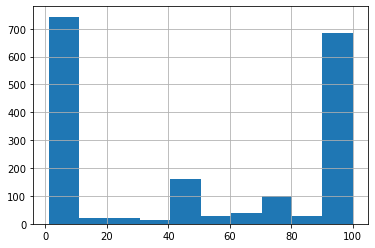

In [29]:
autos.loc[autos['price'].between(1,100), 'price'].hist()

<AxesSubplot:>

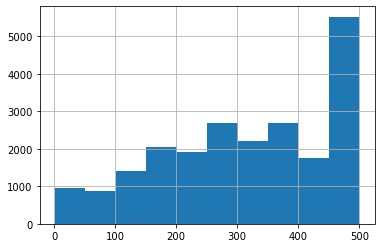

In [30]:
autos.loc[autos['price'].between(1,500), 'price'].hist()

In [31]:
low_price_n = autos[autos['price'] < 100].shape[0]
print(low_price_n)
print(round((low_price_n / autos.shape[0])*100, 2))

8079
2.46


Only ~2.5% of the data set are below 100 euros, so that seems a reasonable cutoff for understanding the data set without getting rid of too much data.

<AxesSubplot:>

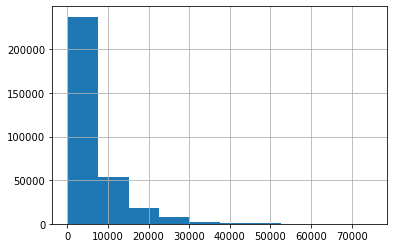

In [32]:
autos.loc[autos['price'].between(100,75000), 'price'].hist()

In [33]:
high_price_n = autos[autos['price'] > 30000].shape[0]
print(high_price_n)
print(round((high_price_n / autos.shape[0])*100, 2))

4809
1.46


Only ~1.5% of the data set lies above a 30,000 euro price, so that's a comfortable high cutoff.

Now, let's restrict the dataset between 100 adn 30,000 euros.

In [34]:
autos = autos.loc[autos['price'].between(100,30000)]
print(autos['price'].describe(percentiles=[.1,.2,.8,.9]))

count    315512.000000
mean       5483.019429
std        5751.706064
min         100.000000
10%         699.000000
20%        1111.000000
50%        3333.000000
80%        8990.000000
90%       13850.000000
max       30000.000000
Name: price, dtype: float64


### Reformatting Date Variables

We have three date variables: date_crawled, last_seen, ad_created. The first three are being seen as strings rather than date variables, so we'll want to convert them to properly investigate them.

Here's a first look at those variables:

In [35]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21
5,2016-04-04 17:36:23,2016-04-04 00:00:00,2016-04-06 19:17:07


Now, let's change them to datetime variables and take another look:

In [36]:
autos['date_crawled'] = pd.to_datetime(autos['date_crawled'], format = "%Y-%m-%d %H:%M:%S")
autos['ad_created'] = pd.to_datetime(autos['ad_created'], format = "%Y-%m-%d %H:%M:%S")
autos['last_seen'] = pd.to_datetime(autos['last_seen'], format = "%Y-%m-%d %H:%M:%S")
print(autos[['date_crawled','ad_created','last_seen']].head())
autos.info()

         date_crawled ad_created           last_seen
1 2016-03-24 10:58:45 2016-03-24 2016-04-07 01:46:50
2 2016-03-14 12:52:21 2016-03-14 2016-04-05 12:47:46
3 2016-03-17 16:54:04 2016-03-17 2016-03-17 17:40:17
4 2016-03-31 17:25:20 2016-03-31 2016-04-06 10:17:21
5 2016-04-04 17:36:23 2016-04-04 2016-04-06 19:17:07
<class 'pandas.core.frame.DataFrame'>
Int64Index: 315512 entries, 1 to 371527
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        315512 non-null  datetime64[ns]
 1   name                315512 non-null  object        
 2   price               315512 non-null  int64         
 3   abtest              315512 non-null  object        
 4   vehicle_type        294352 non-null  object        
 5   registration_year   315491 non-null  float64       
 6   gearbox             309542 non-null  object        
 7   powerPS             315512 non-null  float64       
 

Now, let's examine these three variables with `value_counts()`

In [37]:
autos['date_crawled'].value_counts()

2016-03-19 21:49:56    6
2016-03-16 17:43:49    5
2016-04-01 19:25:23    5
2016-03-05 14:25:23    5
2016-04-01 15:56:46    5
                      ..
2016-03-26 15:51:55    1
2016-03-11 04:36:35    1
2016-03-12 12:56:07    1
2016-03-31 17:49:12    1
2016-03-23 20:57:37    1
Name: date_crawled, Length: 248842, dtype: int64

In [38]:
autos['ad_created'].value_counts()

2016-04-03    12515
2016-04-04    11972
2016-03-20    11594
2016-03-12    11588
2016-03-28    11192
              ...  
2016-01-08        1
2015-08-10        1
2015-12-28        1
2015-11-02        1
2015-09-09        1
Name: ad_created, Length: 110, dtype: int64

In [39]:
autos['last_seen'].value_counts()

2016-04-06 17:46:58    16
2016-04-07 09:44:27    16
2016-04-07 06:45:59    16
2016-04-06 04:15:28    15
2016-04-06 04:17:20    15
                       ..
2016-04-02 14:54:53     1
2016-03-26 16:46:45     1
2016-03-16 19:47:15     1
2016-03-14 15:15:30     1
2016-03-30 15:16:50     1
Name: last_seen, Length: 160276, dtype: int64

date_crawled and last_seen are pretty well distributed across different dates, but ad_created has a subset of dates with a huge number of data points. A bit strange for so many ads to be posted on the same day, but it's not clear whether that will be important for us.

Now that we've cleaned up the data, we can analyze it.

## Analyzing the Data

### What kind of cars are most typically sold in the classifieds on eBay Kleinanzeigen?

To answer this question, we need only see how many ads are placed by brand. The model labels are a bit of a mess, so we won't get too granular here.

First, let's do value counts of the `brand` variable and have a look at it.

In [40]:
brand_counts = autos['brand'].value_counts()
print(brand_counts)
print('\n' + "Total Brands:")
print(brand_counts.shape[0])

volkswagen        68610
bmw               35080
opel              33860
mercedes_benz     29948
audi              28382
ford              21587
renault           14519
peugeot            9646
fiat               7893
seat               6215
skoda              5168
mazda              4939
smart              4605
citroen            4408
nissan             4226
toyota             4176
hyundai            3243
mini               3225
volvo              2957
mitsubishi         2593
honda              2472
kia                2239
alfa_romeo         2043
suzuki             2009
sonstige_autos     1877
chevrolet          1520
chrysler           1190
porsche             910
dacia               821
jeep                669
subaru              662
daihatsu            629
land_rover          554
saab                487
jaguar              487
daewoo              424
lancia              402
rover               384
trabant             294
lada                159
Name: brand, dtype: int64

Total Brands:

There are 40 total brands, but the top seven are a large proportion of the total cars on eBay Kleinanzeigen. Let's see what proportion that is:

In [41]:
print(brand_counts[0:6])
print('\n')
print(str(round(sum(brand_counts[0:6]) / sum(brand_counts)*100, 2)) + "%")

volkswagen       68610
bmw              35080
opel             33860
mercedes_benz    29948
audi             28382
ford             21587
Name: brand, dtype: int64


68.93%


Over 68% of cars sold on eBay Kleinanzeigen are Volkswagens, BMWs, Opels, Mercedes Benz, Audis, Fords, or Renaults.

### What is the price range of the most typically sold cars?

Now that we know the most typically sold cars, we can compare their typical prices. To understand a larger proportion of the data, we'll compare the prices of the top 15 car brands.

To do so, we'll loop across the top 15 brands from the counts variable above, using `pd.DataFrame.describe()` for each brand. We'll create a dataframe in which to keep the data described for all brands. We'll also create a dataframe with this subset of brands for plotting.

In [42]:
# First, we get the top 15 most sold cars from our count variable
top_15 = list(brand_counts.head(15).index)
top_15_autos = autos[autos['brand'].isin(top_15)]
#print(top_15_autos)

# Next, we'll create the header for the data frame
a = autos.loc[autos['brand'] == 'bmw', 'price'].describe()
top_15_head = ['brand'] + list(a.index)

# Next, we create a data frame to fill in
top_15_desc = pd.DataFrame(columns = top_15_head)

#print(top_15_desc)

In [43]:
# Now, let's loop through and add each entry to the dataframe
for b in top_15:
    autos_brand_desc = autos.loc[autos['brand'] == b, 'price'].describe()
    curr_row = top_15_desc.shape[0]
    top_15_desc.loc[curr_row] = b
    top_15_desc.iloc[curr_row, 1:] = autos_brand_desc
    
# And let's look at it sorted by mean price
print(top_15_desc.sort_values('mean', ascending = False))

            brand  count     mean      std  min   25%   50%     75%    max
4            audi  28382  8045.17  7006.16  100  2300  5999   11999  30000
1             bmw  35080  7695.44     6545  100  2500  5980   10990  30000
3   mercedes_benz  29948  7543.22  6753.09  100  2400  5200   10800  30000
10          skoda   5168  6635.62  5168.21  100  2700  5290    9200  29999
0      volkswagen  68610  5342.11  5554.95  100  1395  3200    7500  30000
14         nissan   4226  4843.69   5430.6  100   999  2400  7237.5  29777
9            seat   6215  4677.16  4751.01  100  1200  3000    6700  29999
11          mazda   4939  4250.26  4512.91  100  1194  2750  5582.5  29999
13        citroen   4408  3858.08   3726.6  100  1300  2750    4950  28900
5            ford  21587     3804  4610.25  100   900  1999    4800  30000
12          smart   4605  3700.25  2456.07  199  1899  3000    4999  20000
7         peugeot   9646  3409.05  3350.26  100  1200  2450    4400  29950
2            opel  33860 

And let's do a boxplot of the prices of these brands as well.

<AxesSubplot:xlabel='brand', ylabel='price'>

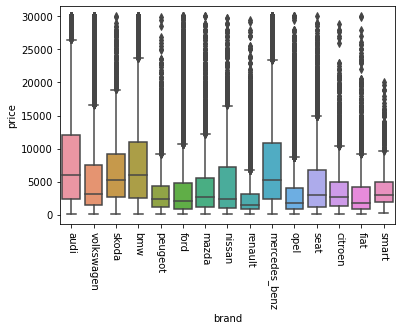

In [44]:
import seaborn as sb
bx = sb.boxplot(x = 'brand', y = 'price', data=top_15_autos)
bx.tick_params(axis='x', labelrotation = -90)
bx

From the description dataframe and the boxplot, several groups are clear. 

The high-price cars, averaging 6,000-8,100 euros are Audi, BMW, Mercedes Benz, and Skoda. 

The mid-price cars, averaging 4,000-5,500 euros, include Volkwagen, Nissan, SEAT, and Mazda. 

The low-price cars, averaging 2,500-4,000 euros include Citroen, Ford, Smart, Peugeot, Opel, Fiat, and Renault. 

Tracking the 75th percentile range of each brand, you can see the same pattern, with higher-priced cars having a higher typical range up to the 75th percentile. Every brand has outliers that push their range higher, though the outliers of Smart cars are interestingly limited to about 20,000 euros.

We can also see from these data that the cheapest common cars sold on eBay Kleinanzeigen are Renaults and Fords, whereas the most expensive common cars are BMWs and Mercedes Benz.

### How quickly do the most typically posted cars on eBay Kleinanzeigen sell?

Although this data set doesn't include information about cars that have been sold, we can approximate how quickly a given brand sells cars relative to the others by the average length of time between the ad's posting and the date that the data was crawled. The longer an ad is typically up, the longer it's taking to be sold.

First, let's create a variable that represents the difference between ad posting and data crawling dates.

In [45]:
autos['time_posted'] = autos['date_crawled'] - autos['ad_created']

Now, let's do the same thing we did with price, creating a dataframe with descriptions of the amount of time that each of the top brands was posted.

In [46]:
# Create the header for the data frame
b = autos.loc[autos['brand'] == 'bmw', 'time_posted'].describe()
top_15_time_head = ['brand'] + list(b.index)

# Create a data frame to fill in
top_15_time_desc = pd.DataFrame(columns = top_15_time_head)

# Loop through brands, describing the amount of time posted
for b in top_15:
    autos_brand_time_desc = autos.loc[autos['brand'] == b, 'time_posted'].describe()
    curr_row = top_15_time_desc.shape[0]
    #print(autos_brand_time_desc)
    #print(curr_row)
    top_15_time_desc.loc[curr_row,:] = b
    top_15_time_desc.iloc[curr_row, 1:] = autos_brand_time_desc
    
# And let's look at it sorted by mean time
print(top_15_time_desc.sort_values('mean', ascending = False))

            brand  count                       mean  \
9            seat   6215  0 days 18:41:49.892196299   
11          mazda   4939  0 days 18:32:17.665519335   
12          smart   4605  0 days 18:22:13.700760043   
8            fiat   7893  0 days 18:16:16.441403775   
4            audi  28382  0 days 18:01:57.588436332   
7         peugeot   9646  0 days 17:58:00.227348123   
0      volkswagen  68610  0 days 17:56:46.978880629   
3   mercedes_benz  29948  0 days 17:50:56.840824095   
13        citroen   4408  0 days 17:46:08.885889292   
10          skoda   5168  0 days 17:42:30.398413312   
1             bmw  35080  0 days 17:39:53.164395667   
2            opel  33860  0 days 17:34:30.237182516   
14         nissan   4226  0 days 17:32:46.461429247   
5            ford  21587  0 days 17:30:09.896697086   
6         renault  14519  0 days 16:59:50.385632619   

                          std              min                     25%  \
9   2 days 09:09:05.312008795  0 days 00:06:3

These data show that there is not a large range of difference in the amount of time posted for the top 15 car brands in this data set. All had been posted on average within the last 16-19 hours before being crawled. The brand that averaged the longest posting time is SEAT, and the shortest is Renault. The 75th percentile across the data also tells us that most cars have only ben posted up to around 21 hours. On the whole, this suggests that a person posting a car on eBay Kleinanzeigen will not have long to wait before their car is sold.

There's also an interesting difference in the max days posted for each brand that tells us more:

In [47]:
print(top_15_time_desc.sort_values('max', ascending = False))

            brand  count                       mean  \
3   mercedes_benz  29948  0 days 17:50:56.840824095   
7         peugeot   9646  0 days 17:58:00.227348123   
0      volkswagen  68610  0 days 17:56:46.978880629   
2            opel  33860  0 days 17:34:30.237182516   
4            audi  28382  0 days 18:01:57.588436332   
9            seat   6215  0 days 18:41:49.892196299   
6         renault  14519  0 days 16:59:50.385632619   
11          mazda   4939  0 days 18:32:17.665519335   
12          smart   4605  0 days 18:22:13.700760043   
1             bmw  35080  0 days 17:39:53.164395667   
8            fiat   7893  0 days 18:16:16.441403775   
14         nissan   4226  0 days 17:32:46.461429247   
5            ford  21587  0 days 17:30:09.896697086   
13        citroen   4408  0 days 17:46:08.885889292   
10          skoda   5168  0 days 17:42:30.398413312   

                          std              min                     25%  \
3   2 days 00:22:45.695831278  0 days 00:25:3

Skodas and Citroens have stayed posted a maximum of 37 and 38 days, whereas Mercedes Benz and Peugots have stayed posted a maximum of 239 and 211 days. This information tells us that Mercedes Benz and Peugots have a higher likelihood of staying unsold after posting than Skodas and Citroens.

## Conclusions

In this project, we explored used cars sold on the German website eBay Kleinanzeigen. We detemined that a large majority (over 68%) of cars sold on eBay Kleinanzeigen are Volkswagens, BMWs, Opels, Mercedes Benz, Audis, Fords, or Renaults. Of these brands and others in the top 15 brands sold, BMWs and Mercedes are most expensive of the common cars, averaging from 6,000 to roughly 8,000 euros, and Renaults and Fords are the cheapest of the common cars, averaging from 2,500 to 4,000 euros. Lastly, we determined that there seems to be a high likelihood of selling one's car on eBay Kleinanzeigen within a day of posting it for sale, regardless of which top brand the car belongs to. However, certain cars, including Mercedes Benz and Peugots, have a higher likelihood of staying unsold for a long period of time.

If a car dealer were to use this information to determine his sale strategy on eBay Kleinanzeigen, they would find a couple of useful strategies in these results. First, Skodas and Citroens might be a safer bet for avoiding large amounts of time posted but unsold. Second, they could confidently sell higher-priced brands like BMW, Audi, and Skoda, knowing that most cars are likely to be sold fairly quickly, keeping in mind however that Mercedes have longer unsold times in outlying situations.